# Train and evaluate a model

In [1]:
import torch
import torch.nn as nn

from src.dataset_helper import Preparer
from src.model_training.custom_data_loader import get_train_test_validation_dataloader
from src.model_training.custom_models import CustomModel_Alpha, CustomModel_Beta
from src.model_training.training import train_model
from src.model_training.evaluation import predict, show_some_image_predictions

## Setup
<p>
These are our main parameter for the model training.
</p>

In [9]:
dataset = "chessman"

train_ratio = 0.8
test_ratio = 0.2
valdiation_ratio = 0.0
learning_rate = 0.01
learning_momentum = 0.9
batch_size = 16
number_of_epochs = 15
image_size = (32, 32)
transformer_name = "default"
image_loader_name = "rgb"
with_class_weights = True
shuffle_data = True

device = "cpu"

In [10]:
data_info_df = Preparer.get_train_test_validation_dataframe(dataset, [train_ratio, test_ratio, valdiation_ratio])

train_data_loader, test_data_loader, validation_data_loader, class_weights = get_train_test_validation_dataloader(
    data_info_df,
    image_size,
    batch_size,
    transformer_name,
    image_loader_name,
    with_class_weights,
    shuffle_data
)

number_of_classes = len(data_info_df["label"].unique())
input_channels = train_data_loader.dataset[0][0].shape[0]

## Train the model

In [11]:
model = CustomModel_Alpha(number_of_classes, input_channels)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=learning_momentum)
weights = torch.tensor(class_weights, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weights)

In [12]:
epoch_loss, epoch_acc = train_model(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    train_data_loader=train_data_loader,
    number_of_epochs=number_of_epochs,
    device=device
)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14


## Evaluate Model

In [13]:
predicted_probs, predicted_classes, labels = predict(model, test_data_loader, device)

/data/jupyter/.local/lib/python/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


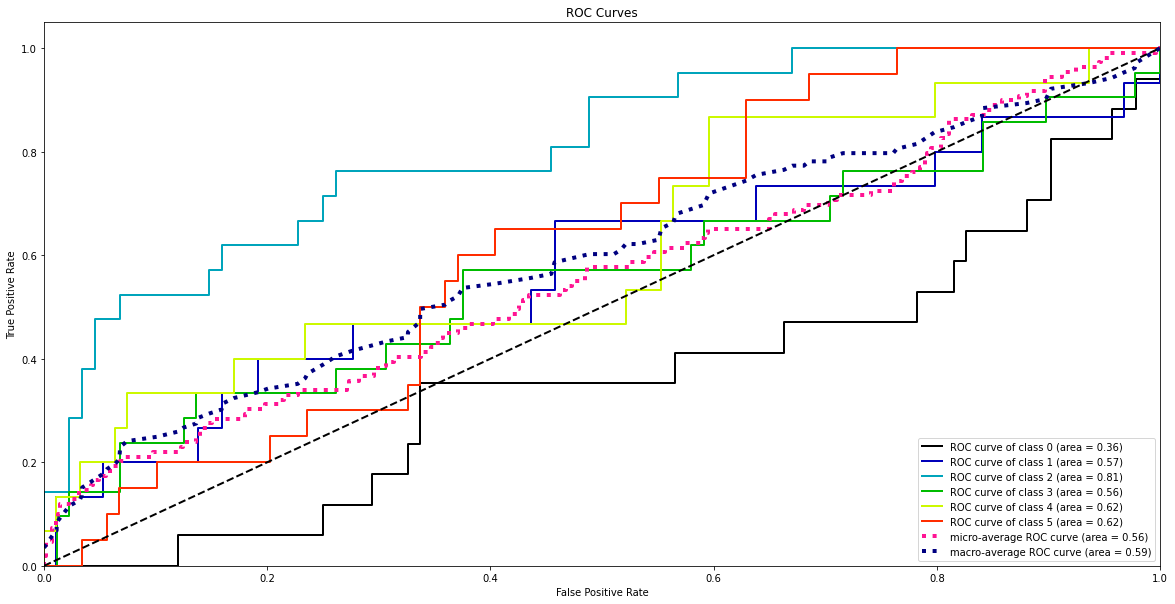

In [14]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(labels, predicted_probs, figsize=(20,10))
plt.show()

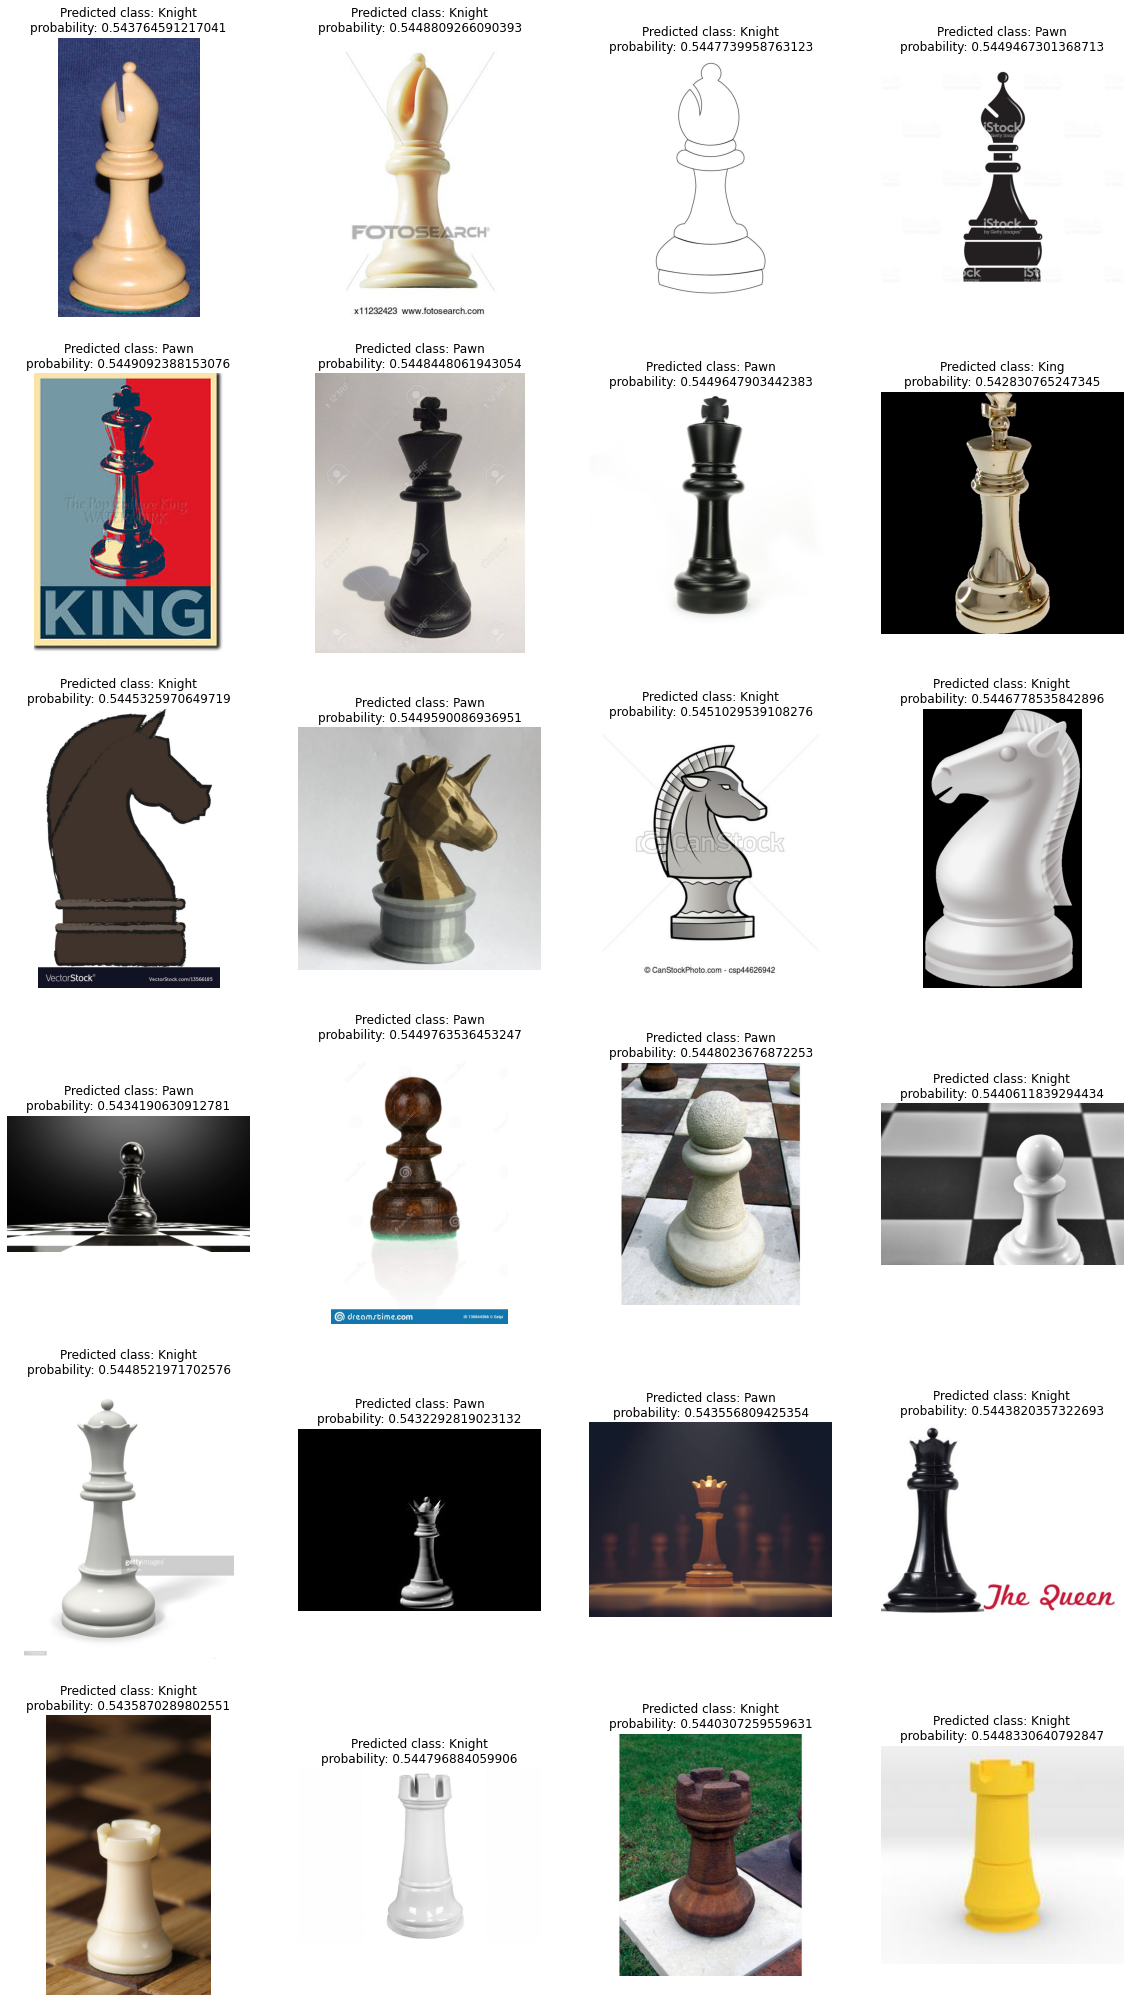

In [15]:
show_some_image_predictions(
    model=model,
    test_data_loader=test_data_loader, 
    device=device, 
    number_of_images_per_class=4
)